/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0921 - val_loss: 0.0176
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[0.37846288]
 [0.3800009 ]
 [0.3731372 ]
 [0.37987846]
 [0.3756516 ]
 [0.38170582]
 [0.37144077]
 [0.3708219 ]
 [0.3745906 ]
 [0.37300938]
 [0.36501557]
 [0.35818338]
 [0.352768  ]
 [0.3509514 ]
 [0.355415  ]
 [0.35436356]
 [0.3519675 ]
 [0.35285896]
 [0.36526543]
 [0.36010993]
 [0.35985547]
 [0.36487705]
 [0.35905316]
 [0.3396489 ]
 [0.32977   ]
 [0.3411939 ]
 [0.34225714]
 [0.34517223]
 [0.34260195]
 [0.34404936]
 [0.3388416 ]
 [0.3431353 ]
 [0.34391186]
 [0.34548834]
 [0.34198081]
 [0.3384086 ]
 [0.34642065]
 [0.3422988 ]
 [0.33351558]
 [0.33247393]
 [0.33664778]
 [0.34156692]
 [0.3430333 ]
 [0.3484907 ]
 [0.3437884 ]
 [0.34008324]
 [0.34622422]
 [0.34797186]
 [0.34580374]
 [0.3447832 ]
 [0.34688053]
 [0.33451882]
 [0.33330745]
 [0.34030747]
 [0.34262538]
 [0.34196794]
 [0.33519846]
 [0.34430462]
 [0.33778244]
 [0.33963948]
 [0.33658764]
 [0.32862377]
 [0.32291198]
 [

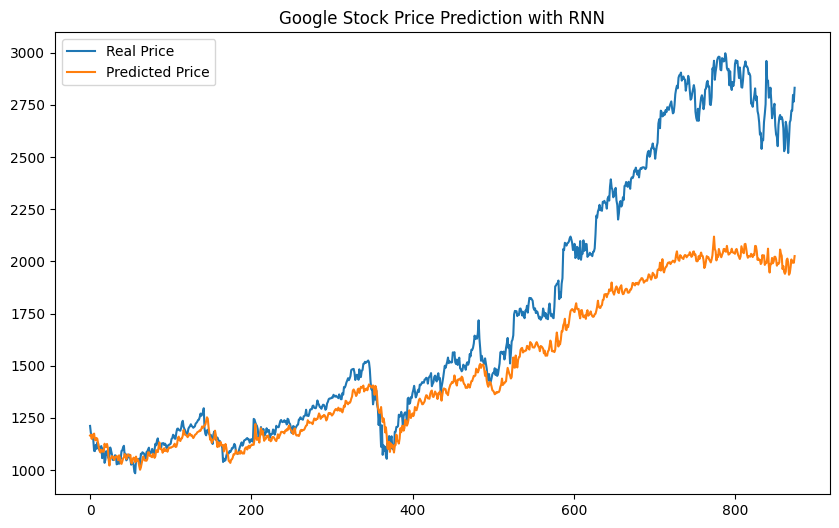

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Load dataset
df = pd.read_csv('/content/GOOGLE Stock Data set - GOOGLE Stock Data set.csv')
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data = df[features].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])        # All features
        y.append(data[i, 3])  # Predicting 'Close' price (index 3)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, window_size=60)

#X = np.reshape(X, (X.shape[0], X.shape[1], 6))  # reshape for RNN

# Split into training/testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(60, 6)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Predict
predictions = model.predict(X_test)
print(predictions)
predicted_data = X_test[:, -1, :].copy()
  # Get the last sequence data for all features
print(predicted_data)
predicted_data[:, 3] = predictions.flatten()  # Replace 'Close' price with predictions
# Now inverse transform the entire predicted data
predicted_prices = scaler.inverse_transform(predicted_data)[:, 3]  # Extract 'Close' price

# Reshape and inverse transform the real prices for plotting
dummy_data = np.zeros((len(y_test), 6))  # Create a dummy array with 6 features
dummy_data[:, 3] = y_test  # Replace the 'Close' price column with y_test values
real_prices = scaler.inverse_transform(dummy_data)[:, 3]  # Extract the 'Close' price after inverse transform

# Plot results
plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.title('Google Stock Price Prediction with RNN')
plt.show()

In [ ]:


predicted_data

array([[0.38886965, 0.39382401, 0.39305491, 0.39340705, 0.39283914,
        0.0188944 ],
       [0.39066102, 0.39035423, 0.39390475, 0.39470652, 0.39415925,
        0.01036536],
       [0.38831845, 0.38757571, 0.38083285, 0.38927433, 0.38246485,
        0.02280942],
       ...,
       [0.89859027, 0.90270837, 0.89893012, 0.8401584 , 0.90676397,
        0.01072405],
       [0.89817352, 0.92955393, 0.91264364, 0.86169648, 0.93232806,
        0.01602731],
       [0.91565715, 0.91974524, 0.92447657, 0.86196738, 0.92151938,
        0.00969694]])

In [ ]:
print(X_test)

[[[0.37654169 0.37670325 0.3803926  0.37909502 0.37909502 0.00735871]
  [0.37171202 0.37903208 0.37793861 0.38056104 0.38056104 0.01465375]
  [0.37817847 0.38626362 0.3839899  0.39067401 0.39067401 0.02132323]
  ...
  [0.3880025  0.38843139 0.3924303  0.39264907 0.39264907 0.01609832]
  [0.39099711 0.3937166  0.39425968 0.39314117 0.39314117 0.01459989]
  [0.38886965 0.39382401 0.39305491 0.39283914 0.39283914 0.0188944 ]]

 [[0.37171202 0.37903208 0.37793861 0.38056104 0.38056104 0.01465375]
  [0.37817847 0.38626362 0.3839899  0.39067401 0.39067401 0.02132323]
  [0.38756897 0.38909917 0.39156342 0.3917464  0.3917464  0.01426201]
  ...
  [0.39099711 0.3937166  0.39425968 0.39314117 0.39314117 0.01459989]
  [0.38886965 0.39382401 0.39305491 0.39283914 0.39283914 0.0188944 ]
  [0.39066102 0.39035423 0.39390475 0.39415925 0.39415925 0.01036536]]

 [[0.37817847 0.38626362 0.3839899  0.39067401 0.39067401 0.02132323]
  [0.38756897 0.38909917 0.39156342 0.3917464  0.3917464  0.01426201]
  [0

In [ ]:
print(y)

[0.01392603 0.0144135  0.01231924 ... 0.93232806 0.92151938 0.94389343]
